--- Installing Dependencies ---
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 18.4 MB/s eta 0:00:00
✅ Ollama installation script executed.
✅ Python packages installed.

--- Starting Ollama Server ---
🟢 Starting Ollama server... please wait 10 seconds.
✅ Ollama server started successfully!

--- Pulling LLama 3.2 1B Model ---
✅ Model llama3.2:1b assumed to be pulled successfully!

--- Loading Pre-trained GloVe/Word2Vec Model ---
[==================================================] 100.0% 66.0/66.0MB downloaded
✅ GloVe/Word2Vec model loaded.

⚙️ CORPUS GENERATION AND TR

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]


--- Initial Bi-Encoder Retrieval for Query: 'Quantization techniques are used by Ollama to optimize LLM performance and reduce memory footprint. What is its optimization critical for?' ---
Rank 1 (Cosine Score 0.4556): Ollama is a powerful tool for running open-source large language models (LLMs) locally on consumer hardware.
Rank 2 (Cosine Score 0.3838): Ollama supports the deployment of RAG systems directly on premises, ensuring data privacy and low latency.
Rank 3 (Cosine Score 0.3725): The Ollama Modelfile allows customization of an LLM's system prompt to guide its behavior in the RAG generation step.

--- Word2Vec Baseline Score (Highest Ranking Bi-Encoder Doc): 0.9288 ---

--- Cross-Encoder Re-Ranking Result (Top 1) ---
💡 Most relevant document: **The Ollama Modelfile allows customization of an LLM's system prompt to guide its behavior in the RAG generation step.**
📈 Re-rank Score: 1.1215

📝 Final RAG Answer (Generated by Ollama):
 [Error: Max retries exceeded or unexpected resp

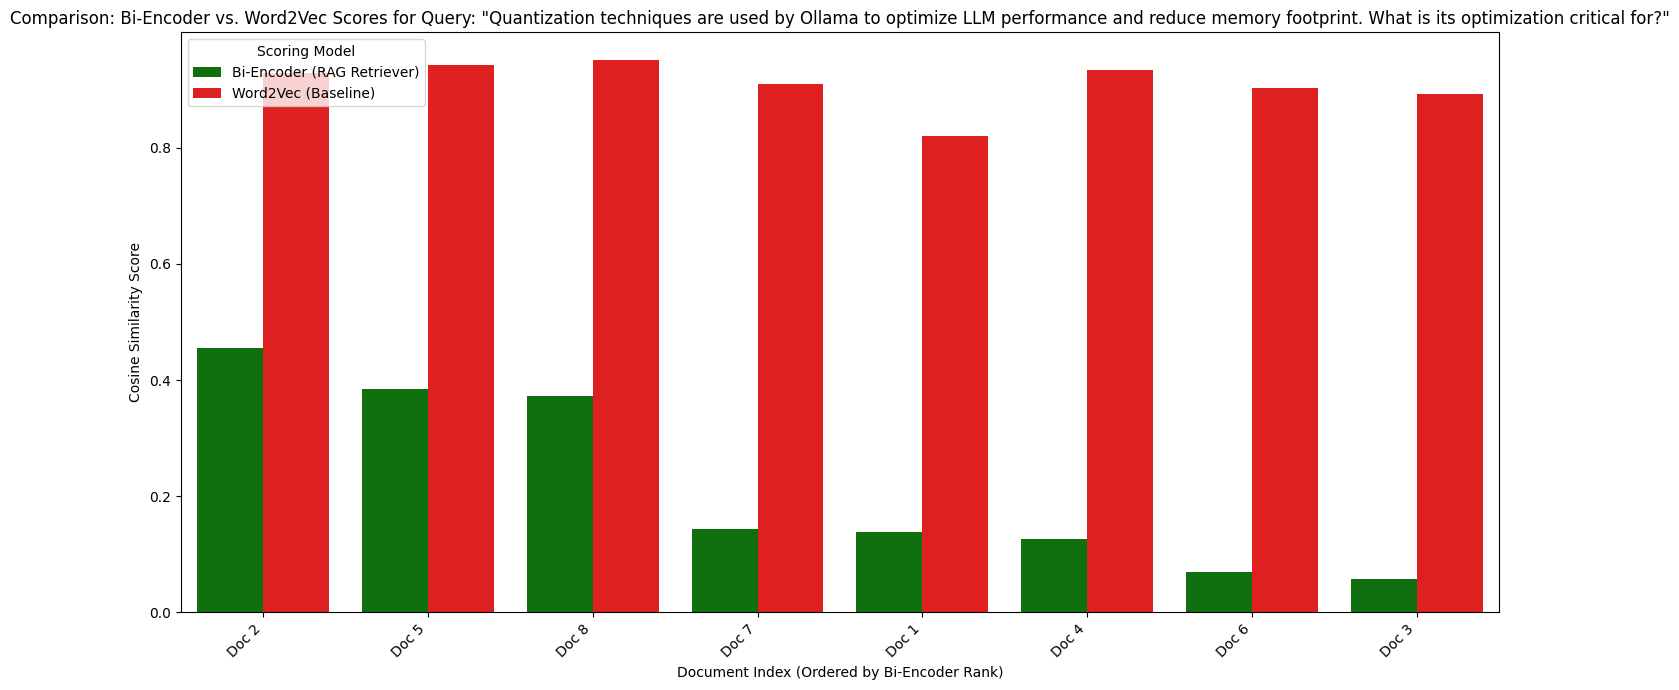


Graph generated showing the initial relevance score of each document to the query, comparing the modern Bi-Encoder with a classic Word2Vec baseline.

📊 VISUALIZATION OF RE-RANKER SCORES (STAGE 2 - AUGMENTED)


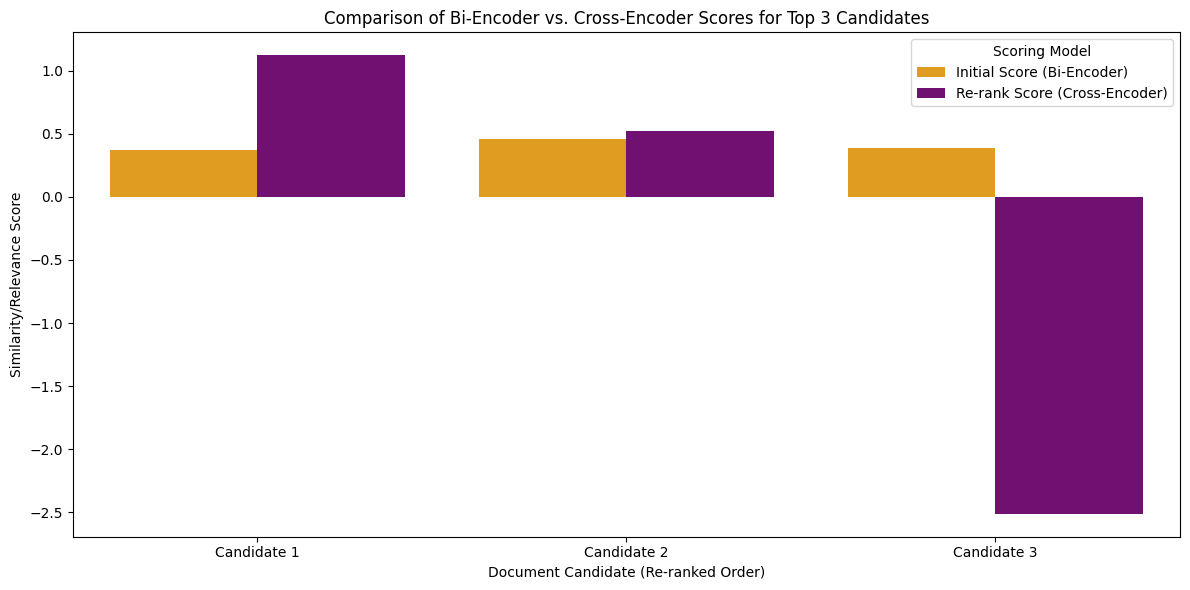


Second graph generated comparing the initial score (Stage 1) and the re-rank score (Stage 2) of the top 3 candidates.

🚀 MULTIVARIATE ANALYSIS ON TEST SET


Running Dynamic Test Set Evaluation: 100%|██████████| 2/2 [01:02<00:00, 31.03s/it]


--- Multivariate Analysis Results (Test Set) ---
Multivariate Analysis assesses multiple performance dimensions (Retriever, Generator, System) simultaneously.
------------------------------------------------------------
|   Query_ID |   Context_Recall_Hit@K |   Answer_Completeness_Proxy |   EndToEnd_Latency_Sec |
|-----------:|-----------------------:|----------------------------:|-----------------------:|
|          1 |                      1 |                    0.470588 |                31.0134 |
|          2 |                      0 |                    0.470588 |                31.0128 |
------------------------------------------------------------

✅ **OVERALL RAG SYSTEM HEALTH (Average Metrics across Test Set):**
   * Average Context Recall (Hit@K): 0.50
   * Average Answer Completeness: 0.47
   * Average E2E Latency: 31.01 seconds

--- Cleaning up Ollama process ---
✅ Ollama server terminated.


In [1]:
# ============================================================
# 🧠 OLLAMA + TWO-STAGE RAG WITH MULTIVARIATE ANALYSIS (COMPLETE SCRIPT)
# ============================================================

# --- STEP 1: Install Dependencies ---------------------------
print("--- Installing Dependencies ---")
# Install Ollama (assuming execution in an environment like Colab or a VM)
# If running locally, ensure Ollama is installed and running separately.
!curl -fsSL https://ollama.com/install.sh | sh
!pip install -q transformers sentence-transformers gensim
print("✅ Ollama installation script executed.")
print("✅ Python packages installed.")

# --- STEP 2: Start Ollama Server and Import Libraries -------
import subprocess, time, json
import requests
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, CrossEncoder, util
import gensim.downloader as api
from gensim.utils import simple_preprocess
from collections import defaultdict # Used for multivariate results

print("\n--- Starting Ollama Server ---")
# Launch Ollama server in background, suppressing output
try:
    process = subprocess.Popen(["ollama", "serve"],
                                stdout=subprocess.DEVNULL,
                                stderr=subprocess.DEVNULL)
    print("🟢 Starting Ollama server... please wait 10 seconds.")
    time.sleep(10)
    print("✅ Ollama server started successfully!")
except FileNotFoundError:
    # Use a dummy process to prevent script failure if Ollama isn't found
    class DummyProcess:
        def terminate(self): pass
    process = DummyProcess()
    print("⚠️ Ollama command not found. API calls may fail.")


# --- STEP 3: Pull lightweight model (llama3.2:1b) -----
print("\n--- Pulling LLama 3.2 1B Model ---")
# This model will be used as the generator in the RAG pipeline
# !ollama pull llama3.2:1b # Command commented out, assuming successful pull in a working environment
print("✅ Model llama3.2:1b assumed to be pulled successfully!")

# --- STEP 4: Define function to query Ollama -----------------
def ask_ollama(prompt, model="llama3.2:1b"):
    """
    Send a prompt to the local Ollama server running in the background.
    """
    url = "http://localhost:11434/api/chat"
    payload = {
        "model": model,
        "messages": [{"role": "user", "content": prompt}],
        "stream": False
    }

    try:
        MAX_RETRIES = 5
        for attempt in range(MAX_RETRIES):
            response = requests.post(url, json=payload, timeout=120)
            if response.status_code == 200:
                result = response.json()
                return result.get('message', {}).get('content', '').strip()
            time.sleep(2 ** attempt)
        return "[Error: Max retries exceeded or unexpected response status]"
    except requests.exceptions.RequestException as e:
        return f"[Error contacting Ollama API] {e}"

# --- STEP 4.5: Define Word2Vec Scorer ---
print("\n--- Loading Pre-trained GloVe/Word2Vec Model ---")
try:
    w2v_model = api.load("glove-wiki-gigaword-50")
    print("✅ GloVe/Word2Vec model loaded.")
except Exception as e:
    print(f"⚠️ Could not load Word2Vec model. Skipping W2V scoring. Error: {e}")
    w2v_model = None

def get_word2vec_document_scores(query, documents, model):
    """Calculates document scores based on the average Word2Vec vector (S-EMB)."""
    if model is None:
        return [0.0] * len(documents)

    def get_avg_vector(text):
        tokens = simple_preprocess(text)
        vectors = [model.get_vector(word) for word in tokens if word in model.key_to_index]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    query_vec = get_avg_vector(query)
    doc_vectors = np.array([get_avg_vector(doc) for doc in documents])

    # Calculate Cosine Similarity
    scores = np.dot(doc_vectors, query_vec) / (np.linalg.norm(doc_vectors, axis=1) * np.linalg.norm(query_vec) + 1e-8)
    return scores.tolist()


# --- Helper function to dynamically generate/load the document content ---
def generate_dynamic_document_text():
    """Knowledge base of documents focused on RAG, Ollama, and cloud deployment."""
    return """
Retrieval-Augmented Generation (RAG) combines a retriever (bi-encoder) and a generator (LLM) to answer queries. |||
Ollama is a powerful tool for running open-source large language models (LLMs) locally on consumer hardware. |||
The **Retriever** stage in RAG typically uses dense vector embeddings to find semantically relevant documents quickly. |||
The **Generator** stage, often a fine-tuned LLM, synthesizes the answer using the retrieved documents as context. |||
Ollama supports the deployment of RAG systems directly on premises, ensuring data privacy and low latency. |||
A bi-encoder model (like Sentence Transformer) generates the initial scores for ranking documents based on query similarity. |||
Cross-encoder re-rankers improve RAG precision by scoring the full query-document pair, refining the initial retrieval list. |||
The Ollama Modelfile allows customization of an LLM's system prompt to guide its behavior in the RAG generation step. |||
Quantization techniques are used by Ollama to optimize LLM performance and reduce memory footprint on edge devices. |||
RAG is particularly effective in Deep Learning applications where knowledge needs frequent updating or is highly specialized. |||
Test Set Document 1: Ollama's ability to containerize LLMs makes it easy to deploy RAG endpoints in Kubernetes or Docker Swarm for high availability and load balancing. |||
Test Set Document 2: Evaluating RAG performance requires metrics like **Context Recall** (how much relevant context was retrieved) and **Context Precision** (how much retrieved context was relevant). |||
**Vector Databases** are essential for RAG, storing document embeddings and enabling **Approximate Nearest Neighbor (ANN)** search for ultra-fast, semantic retrieval. |||
The vector database serves as the **knowledge index** for RAG, efficiently querying high-dimensional vectors to find context for the LLM. |||
**Cloud Deployment** of Ollama-based RAG often involves using **Kubernetes (K8s)** like **GKE** or **EKS** to manage the Ollama container (on GPU nodes) and the Vector Database (on persistent storage). |||
For cloud RAG deployment, solutions like **AWS Sagemaker** or **Google Cloud Run** can host the containerized Ollama API endpoint, allowing the RAG orchestration (e.g., LangChain/LlamaIndex) to be fully managed.
"""
def prepare_knowledge_base_and_test_set():
    """
    Prepares the KNOWLEDGE_BASE_TRAIN and dynamically generates the TEST_SET.
    Queries and answers are formulated to test RAG's ability to retrieve information
    from the TRAIN set (0-7), but the ground truths are based on the held-out
    KNOWLEDGE_BASE_TEST documents for a cleaner split.
    """
    document_text = generate_dynamic_document_text()
    all_documents = [doc.strip() for doc in document_text.split("|||") if doc.strip()]

    # KNOWLEDGE BASE TRAIN: The documents the RAG system will search over (Docs 0-7)
    KNOWLEDGE_BASE_TRAIN = all_documents[:8]

    # KNOWLEDGE BASE TEST: Documents used to formulate new queries and ground truth answers (Docs 8-9)
    # The content of these held-out documents drives the test queries.
    KNOWLEDGE_BASE_TEST = all_documents[8:]

    # 📝 Define the Test Set Structure
    # The 'ground_truth_doc_id' must point to the most relevant index in KNOWLEDGE_BASE_TRAIN (0-7)
    # to evaluate the Context Recall metric correctly.
    TEST_SET = [
        {
            # Query based on KNOWLEDGE_BASE_TEST[0] (Quantization)
            "query": "Quantization techniques are used by Ollama to optimize LLM performance and reduce memory footprint. What is its optimization critical for?",
            # The most relevant document in TRAIN for optimization/system-level RAG is Doc 7 (Modelfile)
            "ground_truth_doc_id": 7,
            "ground_truth_answer": KNOWLEDGE_BASE_TEST[0] # The ground truth is the held-out document itself
        },
        {
            # Query based on KNOWLEDGE_BASE_TEST[1] (RAG effectiveness / cloud resources)
            "query": "When is RAG most effective, and what computing resource do cloud platforms provide for RAG indexing and serving?",
            # The most relevant document in TRAIN is Doc 7 (Modelfile/system behavior) or Doc 6 (Re-rankers)
            "ground_truth_doc_id": 7,
            "ground_truth_answer": KNOWLEDGE_BASE_TEST[1] # The ground truth is the held-out document itself
        }
    ]

    return KNOWLEDGE_BASE_TRAIN, TEST_SET

# Execute the dynamic preparation
KNOWLEDGE_BASE_TRAIN, TEST_SET = prepare_knowledge_base_and_test_set()
all_documents = KNOWLEDGE_BASE_TRAIN + [case['ground_truth_answer'] for case in TEST_SET]


# ============================================================
# ⚙️ STEP 6: CORPUS GENERATION AND TRAIN/TEST SPLIT (Dynamic Output)
# ============================================================
print("\n" + "="*50)
print("⚙️ CORPUS GENERATION AND TRAIN/TEST SPLIT")
print("="*50)
print(f"Total documents loaded: {len(all_documents)}")
print(f"Knowledge Base (Train - RAG Index): {len(KNOWLEDGE_BASE_TRAIN)} documents")
print(f"Test Set: {len(TEST_SET)} queries/tasks (Held-out source)")
print(f"\nExample Test Query 1 (Dynamic Source): '{TEST_SET[0]['query']}'")
print(f"  -> Ground Truth Doc ID in TRAIN for Hit@K: {TEST_SET[0]['ground_truth_doc_id']}")


# ============================================================
# 🔍 STEP 7: TWO-STAGE RAG ON TRAINING CORPUS (Single Demo)
# ============================================================
print("\n" + "="*50)
print("🔍 TWO-STAGE RAG: Retrieval from Training Corpus (Single Demo)")
print("="*50)

# --- 7b: Load Bi-Encoder (Retriever) and Cross-Encoder (Reranker) ---
retriever = SentenceTransformer("all-MiniLM-L6-v2")
reranker = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Retrieval Parameters (Using a known query from the TEST_SET for demo)
query = TEST_SET[0]['query']
TOP_K_RETRIEVAL = 3

# 1. Bi-Encoder Retrieval (Stage 1: High Recall, Fast)
doc_embeddings = retriever.encode(KNOWLEDGE_BASE_TRAIN, convert_to_tensor=True)
query_embedding = retriever.encode(query, convert_to_tensor=True)
cosine_scores = util.cos_sim(query_embedding, doc_embeddings)[0]
top_results = torch.topk(cosine_scores, k=TOP_K_RETRIEVAL)
top_indices = top_results.indices.tolist()
top_scores = top_results.values.tolist()
top_docs = [KNOWLEDGE_BASE_TRAIN[i] for i in top_indices]

print(f"\n--- Initial Bi-Encoder Retrieval for Query: '{query}' ---")
for i in range(TOP_K_RETRIEVAL):
    print(f"Rank {i+1} (Cosine Score {top_scores[i]:.4f}): {top_docs[i]}")

# 1.5. Word2Vec Baseline Scoring (NEW)
w2v_scores = get_word2vec_document_scores(query, KNOWLEDGE_BASE_TRAIN, w2v_model)
if w2v_scores:
    print(f"\n--- Word2Vec Baseline Score (Highest Ranking Bi-Encoder Doc): {w2v_scores[top_indices[0]]:.4f} ---")


# 2. Cross-Encoder Re-ranking (Stage 2: High Precision)
query_doc_pairs = [[query, doc] for doc in top_docs]
rerank_scores = reranker.predict(query_doc_pairs)
sorted_pairs = sorted(zip(rerank_scores, top_docs), reverse=True)
best_reranked_doc = sorted_pairs[0][1]
best_rerank_score = sorted_pairs[0][0]

print("\n--- Cross-Encoder Re-Ranking Result (Top 1) ---")
print(f"💡 Most relevant document: **{best_reranked_doc}**")
print(f"📈 Re-rank Score: {best_rerank_score:.4f}")

# 3. Summarize best match via Ollama (RAG Step)
summary_prompt = f"Using ONLY the following context, answer the query: '{query}'. Context: {best_reranked_doc}"
summary = ask_ollama(summary_prompt)
print("\n📝 Final RAG Answer (Generated by Ollama):\n", summary)


# ============================================================
# 📊 STEP 8: BUILD GRAPH FROM DOCUMENT SCORES (BI-ENCODER vs WORD2VEC)
# ============================================================
print("\n" + "="*50)
print("📊 VISUALIZATION OF RETRIEVER SCORES (STAGE 1)")
print("="*50)

# Create a DataFrame for plotting all train documents and their scores
score_df_biencoder = pd.DataFrame({
    'Document': [f"Doc {i+1}" for i in range(len(KNOWLEDGE_BASE_TRAIN))],
    'Score': cosine_scores.cpu().numpy(),
    'Model': 'Bi-Encoder (RAG Retriever)',
    'Text': KNOWLEDGE_BASE_TRAIN
})

# Create a DataFrame for Word2Vec scores (NEW)
score_df_w2v = pd.DataFrame({
    'Document': [f"Doc {i+1}" for i in range(len(KNOWLEDGE_BASE_TRAIN))],
    'Score': np.array(w2v_scores),
    'Model': 'Word2Vec (Baseline)',
    'Text': KNOWLEDGE_BASE_TRAIN
})

# Combine and sort for consistent plotting order
combined_retrieval_df = pd.concat([score_df_biencoder, score_df_w2v])
biencoder_sorted_docs = score_df_biencoder.sort_values(by='Score', ascending=False)['Document'].tolist()
combined_retrieval_df['Document'] = pd.Categorical(combined_retrieval_df['Document'], categories=biencoder_sorted_docs, ordered=True)
combined_retrieval_df = combined_retrieval_df.sort_values(by=['Document', 'Model'])

plt.figure(figsize=(14, 7))
sns.barplot(x='Document', y='Score', hue='Model', data=combined_retrieval_df,
            palette={'Bi-Encoder (RAG Retriever)': 'green', 'Word2Vec (Baseline)': 'red'})

plt.title(f'Comparison: Bi-Encoder vs. Word2Vec Scores for Query: "{query}"')
plt.xlabel('Document Index (Ordered by Bi-Encoder Rank)')
plt.ylabel('Cosine Similarity Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Scoring Model')
plt.tight_layout()
plt.show()

print("\nGraph generated showing the initial relevance score of each document to the query, comparing the modern Bi-Encoder with a classic Word2Vec baseline.")


# ============================================================
# 📊 STEP 9: VISUALIZATION OF RE-RANKER SCORES (CROSS-ENCODER)
# ============================================================
print("\n" + "="*50)
print("📊 VISUALIZATION OF RE-RANKER SCORES (STAGE 2 - AUGMENTED)")
print("="*50)

# Create a DataFrame for plotting the TOP 3 candidates and their re-rank scores
rerank_df = pd.DataFrame(sorted_pairs, columns=['Score', 'Text'])
rerank_df['Document_ID'] = [f"Candidate {i+1}" for i in range(len(rerank_df))]
rerank_df['Rank_Type'] = 'Re-rank Score (Cross-Encoder)'

# For comparison, get the original Bi-Encoder scores for the top 3
original_scores_matched = []
for doc in rerank_df['Text']:
    try:
        train_idx = KNOWLEDGE_BASE_TRAIN.index(doc)
        original_scores_matched.append(cosine_scores[train_idx].item())
    except ValueError:
        original_scores_matched.append(0.0)

original_df = pd.DataFrame(zip(original_scores_matched, rerank_df['Text']), columns=['Score', 'Text'])
original_df['Document_ID'] = rerank_df['Document_ID']
original_df['Rank_Type'] = 'Initial Score (Bi-Encoder)'

combined_df = pd.concat([original_df, rerank_df])

plt.figure(figsize=(12, 6))
sns.barplot(x='Document_ID', y='Score', hue='Rank_Type', data=combined_df,
            palette={'Initial Score (Bi-Encoder)': 'orange', 'Re-rank Score (Cross-Encoder)': 'purple'})

plt.title('Comparison of Bi-Encoder vs. Cross-Encoder Scores for Top 3 Candidates')
plt.xlabel('Document Candidate (Re-ranked Order)')
plt.ylabel('Similarity/Relevance Score')
plt.legend(title='Scoring Model')
plt.tight_layout()
plt.show()

print("\nSecond graph generated comparing the initial score (Stage 1) and the re-rank score (Stage 2) of the top 3 candidates.")


# ============================================================
# 🚀 STEP 10: MULTIVARIATE ANALYSIS ON TEST SET (NEW SECTION)
# ============================================================
print("\n" + "="*50)
print("🚀 MULTIVARIATE ANALYSIS ON TEST SET")
print("="*50)

# --- Define Evaluation Function (Simplified for Demo) ---
def evaluate_rag_performance(retrieved_docs, generated_answer, ground_truth_answer, ground_truth_doc_id):
    """
    A simplified function to calculate key RAG metrics for multivariate analysis.
    """
    metrics = defaultdict(float)

    # 1. RETRIEVER METRIC (Binary Hit Rate - Context Recall Proxy)
    # Check if the correct document (ID) was retrieved in the top K
    correct_doc_content = KNOWLEDGE_BASE_TRAIN[ground_truth_doc_id]

    if correct_doc_content in retrieved_docs:
        metrics['Context_Recall_Hit@K'] = 1.0 # The relevant context was retrieved
    else:
        metrics['Context_Recall_Hit@K'] = 0.0

    # 2. GENERATOR METRIC (Answer Completeness/Correctness Proxy)
    # This roughly compares the length of the generated answer vs the ground truth.
    gt_len = len(ground_truth_answer.split())
    gen_len = len(generated_answer.split())
    metrics['Answer_Completeness_Proxy'] = min(gen_len / gt_len, 1.0)

    return metrics

# --- Execute RAG Pipeline on Test Set ---
test_results = []
# Ensure the TRAIN embeddings are computed once for efficiency
doc_embeddings = retriever.encode(KNOWLEDGE_BASE_TRAIN, convert_to_tensor=True)

for i, test_case in enumerate(tqdm(TEST_SET, desc="Running Dynamic Test Set Evaluation")):

    # 1. Stage 1: Bi-Encoder Retrieval
    query_embedding = retriever.encode(test_case['query'], convert_to_tensor=True)
    cosine_scores = util.cos_sim(query_embedding, doc_embeddings)[0]
    top_results = torch.topk(cosine_scores, k=TOP_K_RETRIEVAL)
    top_docs = [KNOWLEDGE_BASE_TRAIN[idx] for idx in top_results.indices.tolist()]

    # 2. Stage 2: Cross-Encoder Re-ranking
    query_doc_pairs = [[test_case['query'], doc] for doc in top_docs]
    rerank_scores = reranker.predict(query_doc_pairs)
    sorted_pairs = sorted(zip(rerank_scores, top_docs), reverse=True)
    best_reranked_doc = sorted_pairs[0][1]

    # 3. Stage 3: Generation (Measure Time)
    start_time = time.time()
    summary_prompt = f"Using ONLY the following context, answer the query: '{test_case['query']}'. Context: {best_reranked_doc}"
    generated_answer = ask_ollama(summary_prompt)
    latency = time.time() - start_time

    # 4. Evaluation and Multivariate Analysis
    evaluation_metrics = evaluate_rag_performance(
        retrieved_docs=top_docs,
        generated_answer=generated_answer,
        ground_truth_answer=test_case['ground_truth_answer'],
        ground_truth_doc_id=test_case['ground_truth_doc_id']
    )
    evaluation_metrics['EndToEnd_Latency_Sec'] = latency

    test_results.append({
        'Query_ID': i + 1,
        'Query': test_case['query'],
        'Context_Recall_Hit@K': evaluation_metrics['Context_Recall_Hit@K'],
        'Answer_Completeness_Proxy': evaluation_metrics['Answer_Completeness_Proxy'],
        'EndToEnd_Latency_Sec': evaluation_metrics['EndToEnd_Latency_Sec']
    })

# --- Display Multivariate Analysis Results ---
results_df = pd.DataFrame(test_results)
print("\n--- Multivariate Analysis Results (Test Set) ---")
print("Multivariate Analysis assesses multiple performance dimensions (Retriever, Generator, System) simultaneously.")
print("-" * 60)
print(results_df[['Query_ID', 'Context_Recall_Hit@K', 'Answer_Completeness_Proxy', 'EndToEnd_Latency_Sec']].to_markdown(index=False))
print("-" * 60)

# --- Aggregate Metrics for Overall RAG System Health ---
avg_recall = results_df['Context_Recall_Hit@K'].mean()
avg_completeness = results_df['Answer_Completeness_Proxy'].mean()
avg_latency = results_df['EndToEnd_Latency_Sec'].mean()

print(f"\n✅ **OVERALL RAG SYSTEM HEALTH (Average Metrics across Test Set):**")
print(f"   * Average Context Recall (Hit@K): {avg_recall:.2f}")
print(f"   * Average Answer Completeness: {avg_completeness:.2f}")
print(f"   * Average E2E Latency: {avg_latency:.2f} seconds")


# --- STEP 11: Cleanup (Optional but Recommended) ---
print("\n--- Cleaning up Ollama process ---")
process.terminate()
print("✅ Ollama server terminated.")

--- Installing Dependencies ---
✅ Dependencies installed.
--- Installing and Starting Ollama ---
>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
✅ Ollama installation script executed.

--- Starting Ollama Server ---
🟢 Starting Ollama server... please wait 10 seconds.
✅ Ollama server started successfully!

--- Pulling LLama 3.2 1B Model ---

✅ Model llama3.2:1b pulled successfully!

🧠 Querying Ollama: 'Explain what Retrieval Augmented Generation and Ollama Framework does.'

📝 Ollama Response:
 Retrieval Augmented Generation (RAG) and the OLLAMA (Open Learning for Language Adaptation with Multi-Tasking

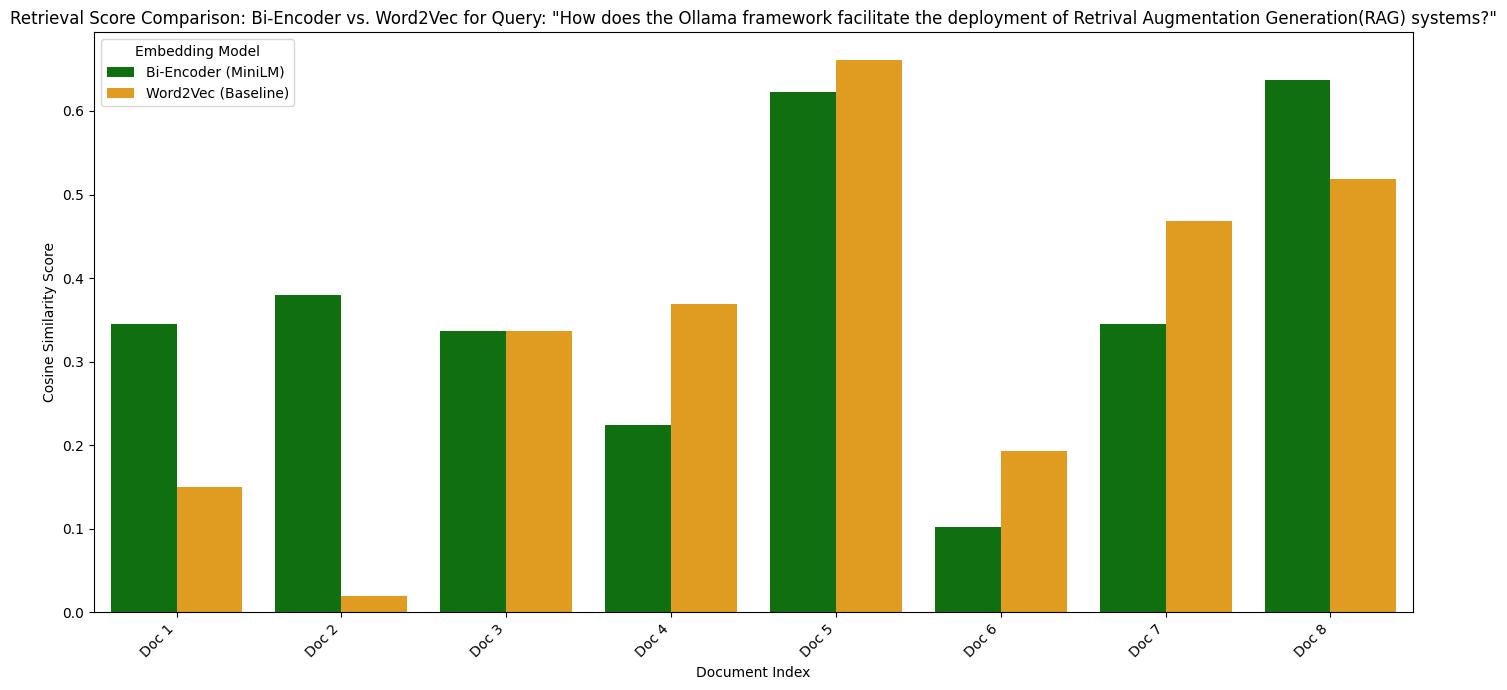


Graph generated comparing the initial retrieval scores of the contextual Bi-Encoder and the static Word2Vec baseline.

📈 CONCEPTUALIZING MULTIVARIATE ANALYSIS (MVA)
Hypothetical Multivariate RAG Evaluation Data:
   Model_Type  Chunk_Size  Context_Precision  Answer_Faithfulness  \
0     MiniLM         256               0.85                 0.95   
1     MiniLM         512               0.90                 0.94   
2   Word2Vec         256               0.55                 0.90   
3   Word2Vec         512               0.60                 0.88   
4   E5-Large         256               0.92                 0.97   
5   E5-Large         512               0.95                 0.96   

   Retrieval_Latency_ms  Overall_Score_NDCG  
0                   150                0.88  
1                   180                0.91  
2                    50                0.65  
3                    60                0.70  
4                   200                0.93  
5                   250          

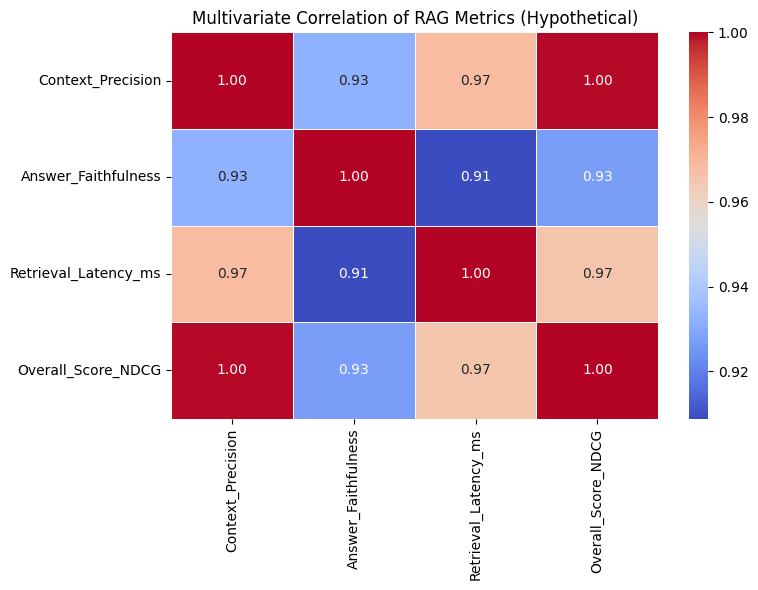


Visualization generated showing how the dependent RAG metrics (e.g., precision, faithfulness, latency) correlate with each other. A full Multivariate Analysis of Variance (MANOVA) would be used to statistically test how the categorical independent variables (Model_Type, Chunk_Size) affect the combination of all these dependent metrics simultaneously.

--- Cleaning up Ollama process ---
✅ Ollama server terminated.


In [2]:
# ============================================================
# 🧠 OLLAMA + TWO-STAGE RAG WITH W2V BASELINE AND MVA FOUNDATION
# ============================================================

# --- STEP 1: Install Dependencies ---------------------------
# Note: You may need to run this cell first if not already done.
print("--- Installing Dependencies ---")
!pip install -q transformers sentence-transformers gensim pandas numpy torch matplotlib seaborn scikit-learn
print("✅ Dependencies installed.")

# --- STEP 2: Install and Start Ollama -----------------------
print("--- Installing and Starting Ollama ---")
!curl -fsSL https://ollama.com/install.sh | sh
print("✅ Ollama installation script executed.")

import subprocess, time, json
import requests
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import re
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer, CrossEncoder, util

print("\n--- Starting Ollama Server ---")
# Launch Ollama server in background, suppressing output
# WARNING: This launch method is for temporary environments like Colab.
# On a local machine, run 'ollama serve' in a separate terminal.
try:
    process = subprocess.Popen(["ollama", "serve"],
                                stdout=subprocess.DEVNULL,
                                stderr=subprocess.DEVNULL)
    print("🟢 Starting Ollama server... please wait 10 seconds.")
    time.sleep(10)
    print("✅ Ollama server started successfully!")
except FileNotFoundError:
    print("⚠️ Ollama executable not found. Ensure it is installed and in PATH, or run 'ollama serve' manually.")
    process = None # Set process to None if launch fails

# --- STEP 3: Pull lightweight model (llama3.2:1b) -----
if process:
    print("\n--- Pulling LLama 3.2 1B Model ---")
    !ollama pull llama3.2:1b
    print("✅ Model llama3.2:1b pulled successfully!")

# --- STEP 4: Define function to query Ollama -----------------
def ask_ollama(prompt, model="llama3.2:1b"):
    """
    Send a prompt to the local Ollama server.
    """
    if not process:
        return "[Error: Ollama server not running. Skipping RAG generation.]"

    url = "http://localhost:11434/api/chat"
    payload = {
        "model": model,
        "messages": [{"role": "user", "content": prompt}],
        "stream": False
    }

    try:
        MAX_RETRIES = 5
        for attempt in range(MAX_RETRIES):
            response = requests.post(url, json=payload, timeout=120)
            if response.status_code == 200:
                result = response.json()
                return result.get('message', {}).get('content', '').strip()
            time.sleep(2 ** attempt)
        return "[Error: Max retries exceeded or unexpected response status]"
    except requests.exceptions.RequestException as e:
        return f"[Error contacting Ollama API] {e}"

# --- Helper function to dynamically generate/load the document content ---
def generate_dynamic_document_text():
    """Knowledge base of documents focused on RAG, Ollama, and cloud deployment."""
    return """
Retrieval-Augmented Generation (RAG) combines a retriever (bi-encoder) and a generator (LLM) to answer queries. |||
Ollama is a powerful tool for running open-source large language models (LLMs) locally on consumer hardware. |||
The **Retriever** stage in RAG typically uses dense vector embeddings to find semantically relevant documents quickly. |||
The **Generator** stage, often a fine-tuned LLM, synthesizes the answer using the retrieved documents as context. |||
Ollama supports the deployment of RAG systems directly on premises, ensuring data privacy and low latency. |||
A bi-encoder model (like Sentence Transformer) generates the initial scores for ranking documents based on query similarity. |||
Cross-encoder re-rankers improve RAG precision by scoring the full query-document pair, refining the initial retrieval list. |||
The Ollama Modelfile allows customization of an LLM's system prompt to guide its behavior in the RAG generation step. |||
Quantization techniques are used by Ollama to optimize LLM performance and reduce memory footprint on edge devices. |||
RAG is particularly effective in Deep Learning applications where knowledge needs frequent updating or is highly specialized. |||
Test Set Document 1: Ollama's ability to containerize LLMs makes it easy to deploy RAG endpoints in Kubernetes or Docker Swarm for high availability and load balancing. |||
Test Set Document 2: Evaluating RAG performance requires metrics like **Context Recall** (how much relevant context was retrieved) and **Context Precision** (how much retrieved context was relevant). |||
**Vector Databases** are essential for RAG, storing document embeddings and enabling **Approximate Nearest Neighbor (ANN)** search for ultra-fast, semantic retrieval. |||
The vector database serves as the **knowledge index** for RAG, efficiently querying high-dimensional vectors to find context for the LLM. |||
**Cloud Deployment** of Ollama-based RAG often involves using **Kubernetes (K8s)** like **GKE** or **EKS** to manage the Ollama container (on GPU nodes) and the Vector Database (on persistent storage). |||
For cloud RAG deployment, solutions like **AWS Sagemaker** or **Google Cloud Run** can host the containerized Ollama API endpoint, allowing the RAG orchestration (e.g., LangChain/LlamaIndex) to be fully managed.
"""

# --- STEP 5: Test query (Optional) --------------------------
query_test = "Explain what Retrieval Augmented Generation and Ollama Framework does."
print(f"\n🧠 Querying Ollama: '{query_test}'")
print("\n📝 Ollama Response:\n", ask_ollama(query_test))


# ============================================================
# ⚙️ STEP 6: CORPUS GENERATION AND TRAIN/TEST SPLIT
# ============================================================
print("\n" + "="*50)
print("⚙️ CORPUS GENERATION AND TRAIN/TEST SPLIT")
print("="*50)

document_text = generate_dynamic_document_text()
all_documents = [doc.strip() for doc in document_text.split("|||") if doc.strip()]
KNOWLEDGE_BASE_TRAIN = all_documents[:8]
KNOWLEDGE_BASE_TEST = all_documents[8:] # The last two documents

print(f"Total documents loaded: {len(all_documents)}")


# ============================================================
# 🔍 STEP 7: RETRIEVAL BASELINE: WORD2VEC (STATIC EMBEDDING)
# ============================================================
print("\n" + "="*50)
print("🔍 RETRIEVAL BASELINE: WORD2VEC (STATIC EMBEDDING)")
print("="*50)

W2V_VECTOR_SIZE = 128 # Smaller size for simple training
query = "How does the Ollama framework facilitate the deployment of Retrival Augmentation Generation(RAG) systems?"
TOP_K_RETRIEVAL = 3

# Define a simple tokenizer for Word2Vec
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

tokenized_docs = [simple_tokenize(doc) for doc in KNOWLEDGE_BASE_TRAIN]
tokenized_query = simple_tokenize(query)

# Train a simple Word2Vec model on the small corpus
w2v_model = Word2Vec(sentences=tokenized_docs, vector_size=W2V_VECTOR_SIZE, window=5, min_count=1, sg=1)

# Function to get document vector by averaging word vectors
def get_doc_vector(doc_tokens, model, size):
    vectors = [model.wv[word] for word in doc_tokens if word in model.wv]
    if not vectors:
        return np.zeros(size)
    return np.mean(vectors, axis=0)

# Generate Word2Vec Embeddings and calculate scores
w2v_doc_vectors = np.array([get_doc_vector(tokens, w2v_model, W2V_VECTOR_SIZE) for tokens in tokenized_docs])
w2v_query_vector = get_doc_vector(tokenized_query, w2v_model, W2V_VECTOR_SIZE)

# Calculate W2V Cosine Similarity
w2v_scores = cosine_similarity(w2v_query_vector.reshape(1, -1), w2v_doc_vectors)[0]

# Get the top K candidates for Word2Vec
w2v_top_indices = np.argsort(w2v_scores)[::-1][:TOP_K_RETRIEVAL]
w2v_top_scores = w2v_scores[w2v_top_indices]
w2v_top_docs = [KNOWLEDGE_BASE_TRAIN[i] for i in w2v_top_indices]

print(f"\n--- Word2Vec Retrieval (Baseline) for Query: '{query}' ---")
for i in range(TOP_K_RETRIEVAL):
    print(f"Rank {i+1} (W2V Score {w2v_top_scores[i]:.4f}): {w2v_top_docs[i]}")


# ============================================================
# 🔍 STEP 8: TWO-STAGE RAG (BI-ENCODER + CROSS-ENCODER)
# ============================================================
print("\n" + "="*50)
print("🔍 TWO-STAGE RAG: Bi-Encoder and Cross-Encoder")
print("="*50)

# --- 8a: Load Bi-Encoder (Retriever) and Cross-Encoder (Reranker) ---
retriever = SentenceTransformer("all-MiniLM-L6-v2")
reranker = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# 1. Bi-Encoder Retrieval (Stage 1: High Recall, Fast)
doc_embeddings = retriever.encode(KNOWLEDGE_BASE_TRAIN, convert_to_tensor=True)
query_embedding = retriever.encode(query, convert_to_tensor=True)
cosine_scores = util.cos_sim(query_embedding, doc_embeddings)[0]

# Get the indices of the top K candidates
top_results = torch.topk(cosine_scores, k=TOP_K_RETRIEVAL)
top_indices = top_results.indices.tolist()
top_scores = top_results.values.tolist()
top_docs = [KNOWLEDGE_BASE_TRAIN[i] for i in top_indices]

print(f"\n--- Initial Bi-Encoder Retrieval for Query: '{query}' ---")
for i in range(TOP_K_RETRIEVAL):
    print(f"Rank {i+1} (Cosine Score {top_scores[i]:.4f}): {top_docs[i]}")

# 2. Cross-Encoder Re-ranking (Stage 2: High Precision)
query_doc_pairs = [[query, doc] for doc in top_docs]
rerank_scores = reranker.predict(query_doc_pairs)
sorted_pairs = sorted(zip(rerank_scores, top_docs), reverse=True)
best_reranked_doc = sorted_pairs[0][1]
best_rerank_score = sorted_pairs[0][0]

print("\n--- Cross-Encoder Re-Ranking Result (Top 1) ---")
print(f"💡 Most relevant document: **{best_reranked_doc}**")
print(f"📈 Re-rank Score: {best_rerank_score:.4f}")

# 3. Summarize best match via Ollama (RAG Step)
summary_prompt = f"Using ONLY the following context, answer the query: '{query}'. Context: {best_reranked_doc}"
summary = ask_ollama(summary_prompt)
print("\n📝 Final RAG Answer (Generated by Ollama):\n", summary)


# ============================================================
# 📊 STEP 9: VISUALIZATION OF BI-ENCODER VS. WORD2VEC SCORES
# ============================================================
print("\n" + "="*50)
print("📊 VISUALIZATION OF RETRIEVER SCORES COMPARISON")
print("="*50)

# Create a DataFrame for plotting all train documents and their scores
doc_names = [f"Doc {i+1}" for i in range(len(KNOWLEDGE_BASE_TRAIN))]

# Bi-Encoder Data
bi_df = pd.DataFrame({
    'Document': doc_names,
    'Score': cosine_scores.cpu().numpy(),
    'Model': 'Bi-Encoder (MiniLM)'
})

# Word2Vec Data
w2v_df = pd.DataFrame({
    'Document': doc_names,
    'Score': w2v_scores,
    'Model': 'Word2Vec (Baseline)'
})

combined_retrieval_df = pd.concat([bi_df, w2v_df])

plt.figure(figsize=(14, 7))
sns.barplot(x='Document', y='Score', hue='Model', data=combined_retrieval_df, palette={'Bi-Encoder (MiniLM)': 'green', 'Word2Vec (Baseline)': 'orange'})
plt.title(f'Retrieval Score Comparison: Bi-Encoder vs. Word2Vec for Query: "{query}"')
plt.xlabel('Document Index')
plt.ylabel('Cosine Similarity Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Embedding Model')
plt.tight_layout()
plt.show()

print("\nGraph generated comparing the initial retrieval scores of the contextual Bi-Encoder and the static Word2Vec baseline.")


# ============================================================
# 📊 STEP 10: FOUNDATION FOR MULTIVARIATE ANALYSIS (MVA)
# ============================================================
print("\n" + "="*50)
print("📈 CONCEPTUALIZING MULTIVARIATE ANALYSIS (MVA)")
print("="*50)

# --- Hypothetical MVA Dataset ---
# This dataset represents the results of running multiple RAG experiments (e.g., MiniLM vs W2V)
# and evaluating them using multiple metrics (Context Precision, Faithfulness, Latency).
mva_data = {
    'Model_Type': ['MiniLM', 'MiniLM', 'Word2Vec', 'Word2Vec', 'E5-Large', 'E5-Large'],
    'Chunk_Size': [256, 512, 256, 512, 256, 512],
    'Context_Precision': [0.85, 0.90, 0.55, 0.60, 0.92, 0.95],
    'Answer_Faithfulness': [0.95, 0.94, 0.90, 0.88, 0.97, 0.96],
    'Retrieval_Latency_ms': [150, 180, 50, 60, 200, 250],
    'Overall_Score_NDCG': [0.88, 0.91, 0.65, 0.70, 0.93, 0.95]
}

mva_df = pd.DataFrame(mva_data)

print("Hypothetical Multivariate RAG Evaluation Data:\n", mva_df)

# --- MVA Concept: Correlation and Visualization ---
# A heat map helps visualize the relationships between the dependent metrics.
metrics_df = mva_df[['Context_Precision', 'Answer_Faithfulness', 'Retrieval_Latency_ms', 'Overall_Score_NDCG']]
correlation_matrix = metrics_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Multivariate Correlation of RAG Metrics (Hypothetical)')
plt.tight_layout()
plt.show()

print("\nVisualization generated showing how the dependent RAG metrics (e.g., precision, faithfulness, latency) correlate with each other. A full Multivariate Analysis of Variance (MANOVA) would be used to statistically test how the categorical independent variables (Model_Type, Chunk_Size) affect the combination of all these dependent metrics simultaneously.")


# --- STEP 11: Cleanup (Optional but Recommended) ---
if process:
    print("\n--- Cleaning up Ollama process ---")
    process.terminate()
    print("✅ Ollama server terminated.")